In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = [20.0, 10.0]
sns.set_context('talk')  # fuentes más grandes

### Cambiar el origen de los datos a local (`03009sc.csv`) en caso de problemas de conectividad

In [3]:
csv_datos = 'http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/nacim/a2017/l0/03022.csv_sc?nocab=1'
# csv_datos = 'nacimientos.csv'

In [4]:
# Descarga los datos y limpia datos innecesarios
nacimientos = pd.read_csv(csv_datos,
                          sep=';',
                          encoding='utf-8',
                          skipfooter=2, engine='python',
                          na_values='..',
                          header=[4, 5],
                          index_col=0)

nacimientos.dropna(axis=1, inplace=True)
meses = nacimientos.columns.get_level_values(0)[0::3].values.repeat(3)
nacimientos.columns = pd.MultiIndex.from_tuples(
    zip(meses, nacimientos.columns.get_level_values(1)),
    names=['Mes', 'Sexo']
)

Sexo,Total,Hombres,Mujeres
Cantabria,4118.0,2120.0,1998.0
"Rioja, La",2566.0,1364.0,1202.0
Murcia,15088.0,7729.0,7359.0
Asturias,6012.0,3123.0,2889.0
Navarra,5746.0,2928.0,2818.0
"Balears, Illes",10288.0,5289.0,4999.0
Madrid,60555.0,31136.0,29419.0


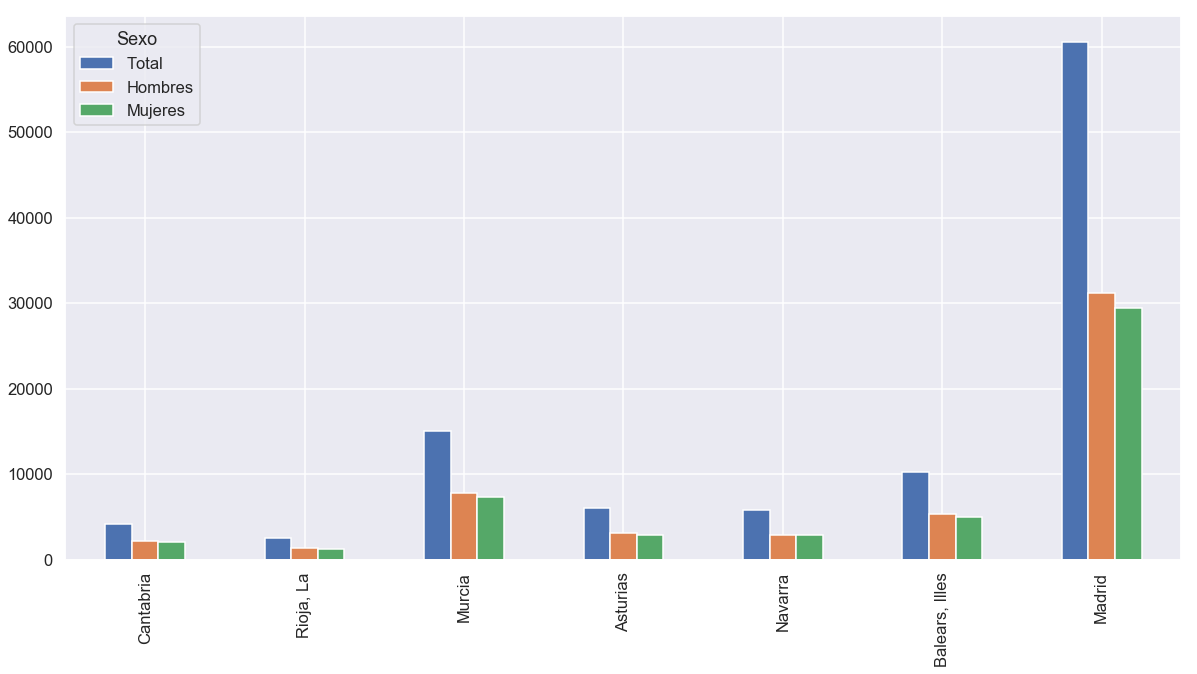

In [5]:
uniprovinciales = ['Cantabria', 'Rioja, La', 'Murcia', 'Asturias', 'Navarra', 'Balears, Illes', 'Madrid']
# provincias que empiezan por la letra 'G'
provincias_g = [prov for prov in nacimientos.index if prov.upper().startswith('G')]

dfu = nacimientos.Total.reindex(uniprovinciales)

#####
dfu.plot.bar();  # crea gráfico de barras
#####
dfu

## 1 - Crea una figura con 2 subplots (uno junto al otro) y dibuja los gráficos de barras para `uniprovinciales` y `provincias_g`

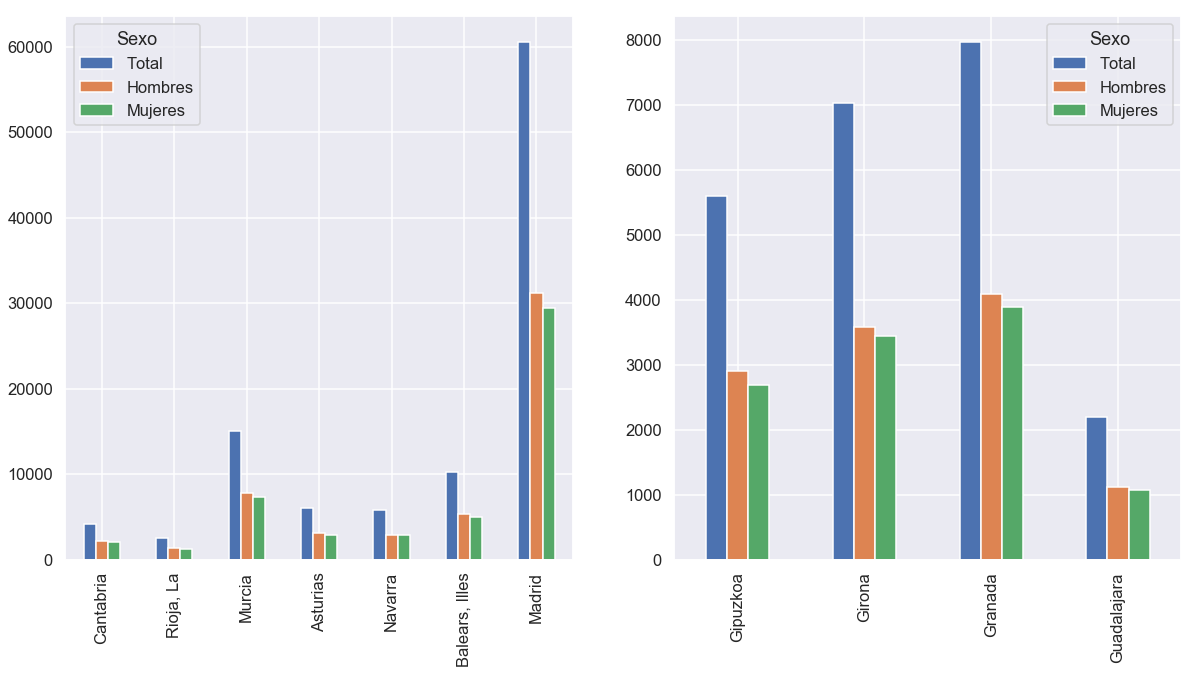

In [6]:
dfg = nacimientos.Total.reindex(provincias_g)

fig, (eje1, eje2) = plt.subplots(1, 2, figsize=(20, 10))
dfu.plot.bar(ax=eje1)
dfg.plot.bar(ax=eje2);

### 1.2 Repite el mismo gráfico con barras apiladas
- **BONUS**: Omite la columna 'Total'
- **BONUS**: Comparte el eje de ordenadas entre las dos gráficas

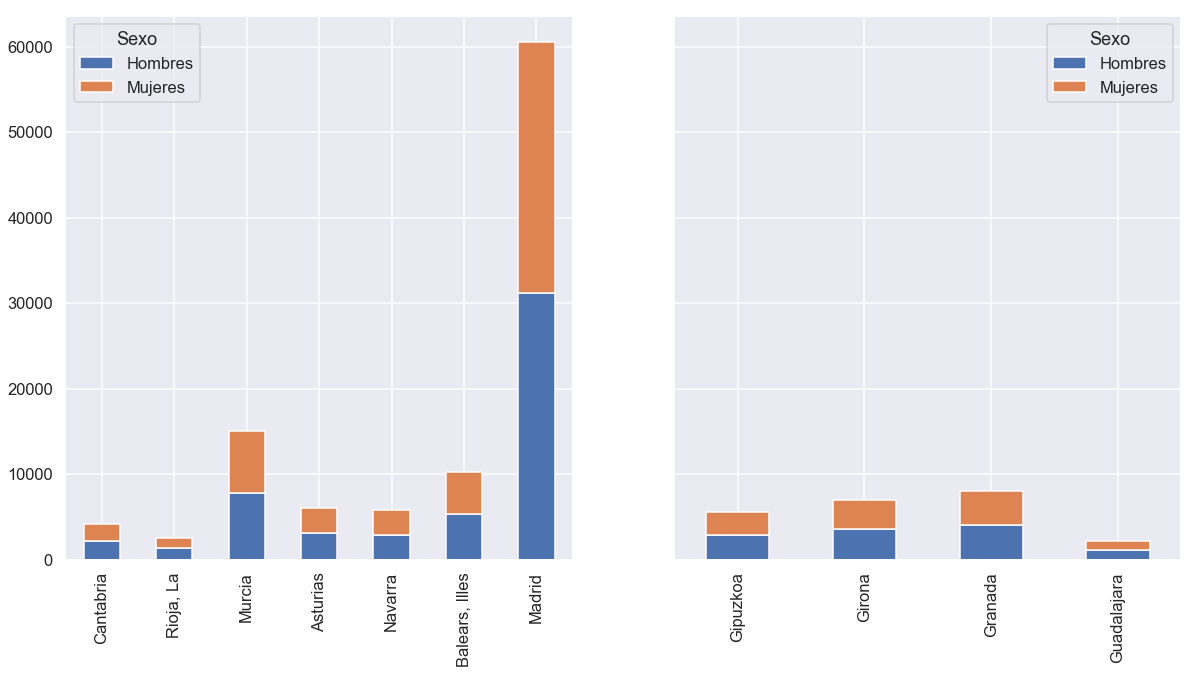

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
dfu.drop('Total', axis=1).plot.bar(stacked=True, ax=ax1)
dfg.drop('Total', axis=1).plot.bar(stacked=True, ax=ax2);

## 2 - Representa la evolución anual para cada provincia de (`datos_meses`)

- Eje 'x': tiempo
- Eje 'y': Total de matrimonios
- **`[BONUS #1]`**: Excluir datos de Madrid
- **`[BONUS #2]`** Estilo de línea: contínua con marcadores en 'v'

In [8]:
dfu = nacimientos.reindex(uniprovinciales)        # filtra por provincias
dfu.drop('Total', axis=1, level=0, inplace=True)  # tira columna de totales
dfu_totales = dfu.xs('Total', axis=1, level=1)    # extrae columna de totales

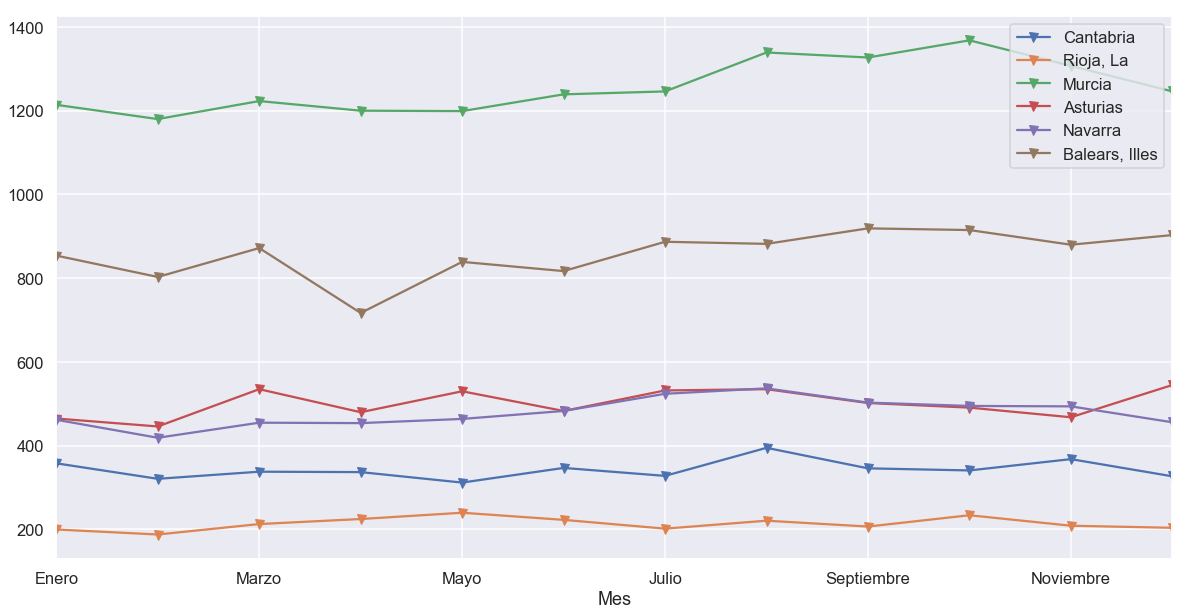

In [9]:
# dfu_totales.T.plot();
# dfu_totales.drop('Madrid').T.plot();
dfu_totales.drop('Madrid').T.plot(style='-v');

### 2.2 Repetir con un gráfico por provincia colocadas una junto a la otra (usar `layout`)

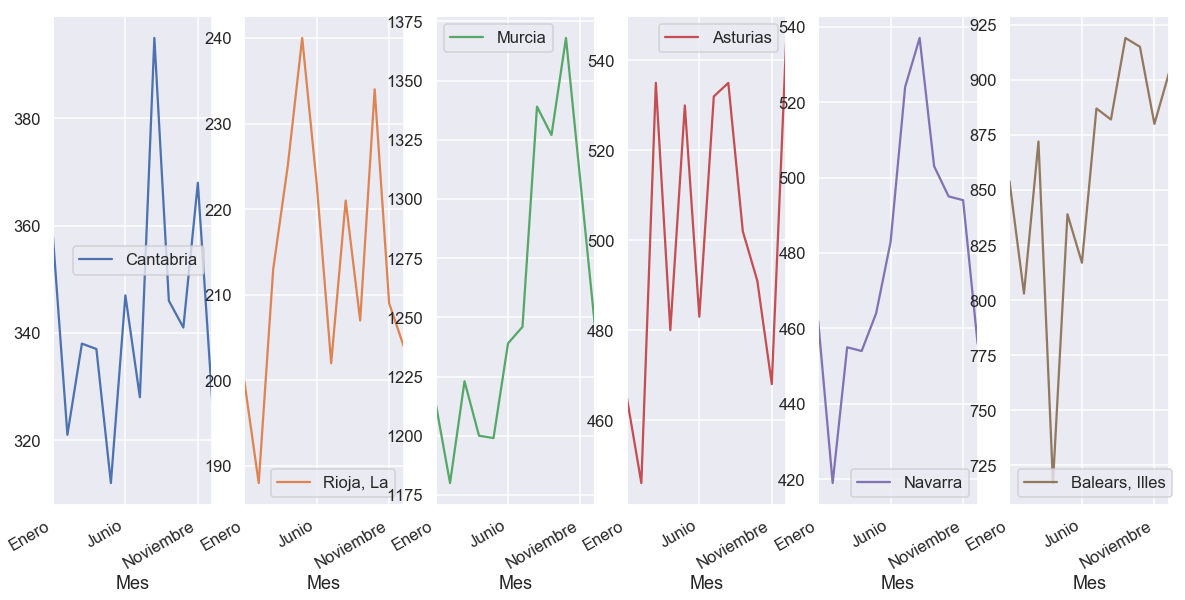

In [10]:
dfu_totales.drop('Madrid').T.plot(
    subplots=True,
    layout=(1, len(dfu_totales)-1),
);

## 3 - Mismo gráfico que en `2.2`, pero compartiendo el eje 'y'

- **`[BONUS #1]`**: excluir datos de Madrid
- **`[BONUS #2]`**: dibujar una marca en el eje de abcisas cada 3 meses

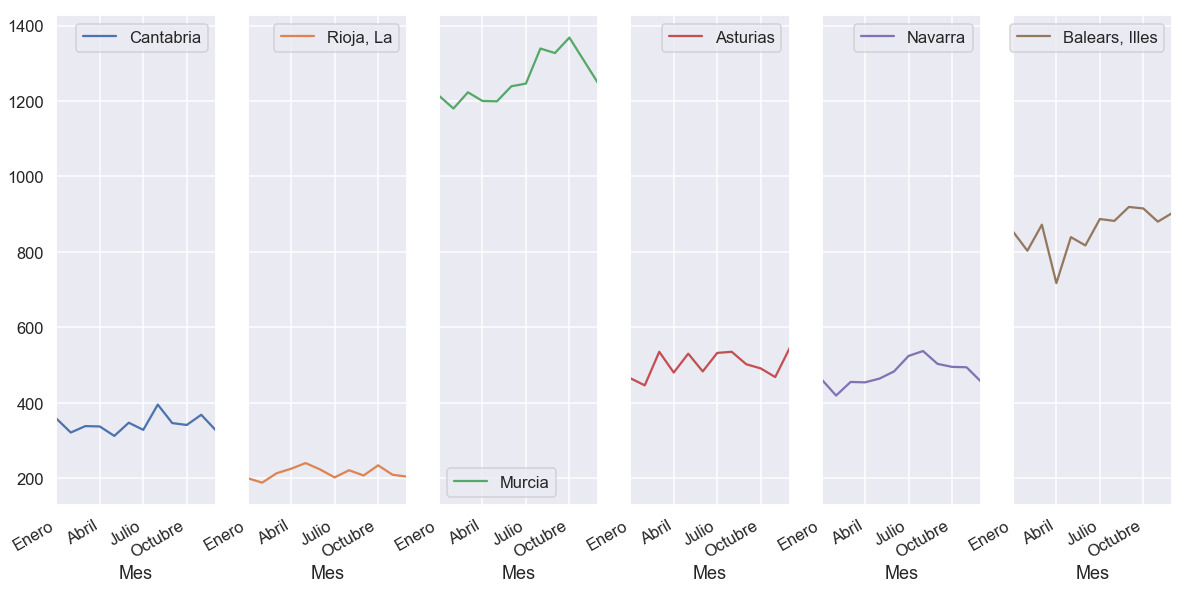

In [11]:
# dfu_totales.T.plot(
#     subplots=True,
#     layout=(1, len(uniprovinciales) - 1),
#     sharey=True
# );

# dfu_totales.drop('Madrid').T.plot(
#     subplots=True,
#     layout=(1, len(uniprovinciales) - 1),
#     sharey=True
# );

dfu_totales.drop('Madrid').T.plot(
    subplots=True,
    layout=(1, len(uniprovinciales) - 1),
    sharey=True,
    xticks=range(0, 12, 3)
);

## 4 - Nombrar cada gráfico de (3) con un título

- **`[BONUS]`**: Establecer una nota (título) global para toda la figura
  `plt.gca().get_figure()` obtiene la referencia a la figura

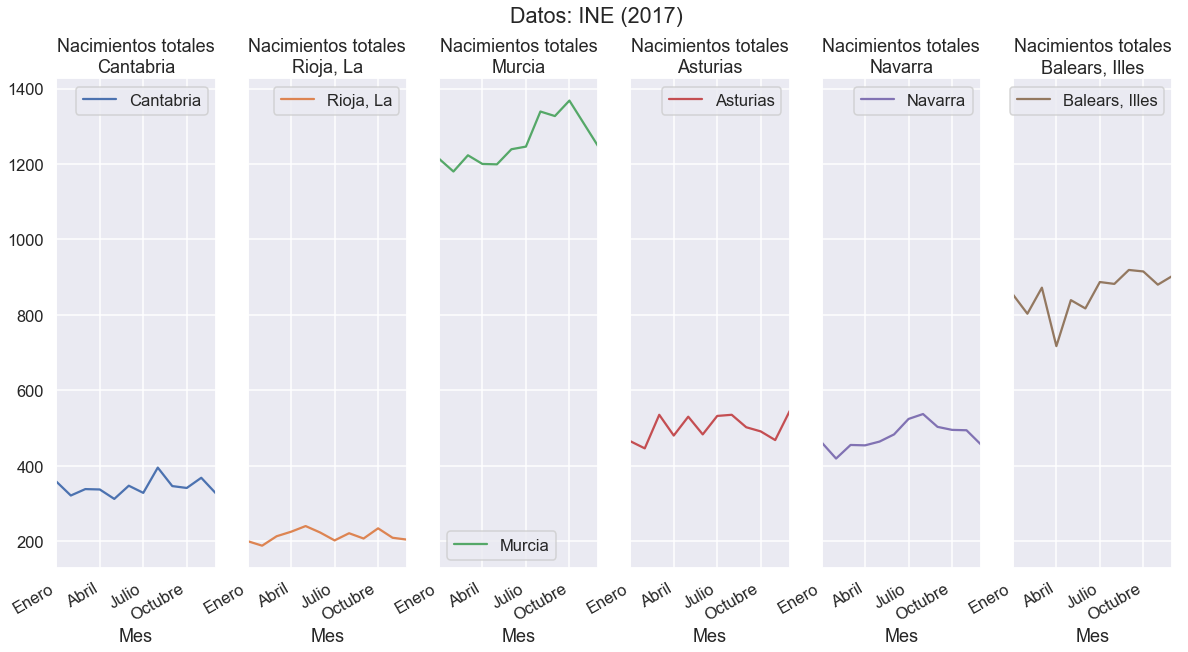

In [12]:
dfu_totales.drop('Madrid').T.plot(
    subplots=True,
    layout=(1, len(uniprovinciales) - 1),
    sharey=True,
    xticks=range(0, 12, 3),
    title=[f'Nacimientos totales\n{prov}' for prov in uniprovinciales if prov is not 'Madrid']
)

plt.gca().get_figure().suptitle('Datos: INE (2017)');

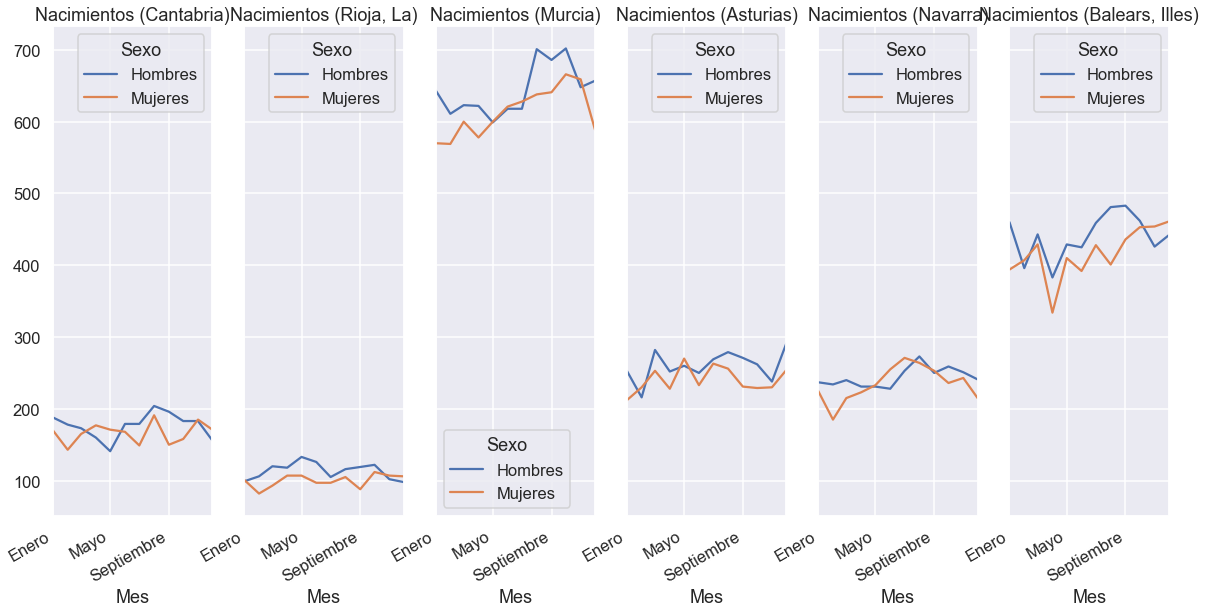

In [13]:
import dateparser

nprov = len(dfu.drop('Madrid').index)
(fig, ax) = plt.subplots(1, nprov, sharey=True)

for (n, prov) in enumerate(dfu.drop('Madrid').index):
    dfp = dfu.drop('Total', axis=1, level=1).T[prov].unstack()
    dfp.index = dfp.index.map(dateparser.parse)
    dfp.plot(title=f'Nacimientos ({prov})', ax=ax[n], xticks=dfp.index[::4])
    ax[n].set_xticklabels(dfu.columns.get_level_values(level=0)[::12])


## 5 - Crear un gráfico de área con los datos de Cantabria

- Establecer un tamaño de 12 pulgadas de ancho por 8 de alto
- Excluir la columna de datos totales

In [14]:
datos_cantabria = nacimientos.loc['Cantabria'].drop('Total', level=0).unstack()
datos_cantabria

Sexo,Hombres,Mujeres,Total
Mes,,,
Enero,188.0,170.0,358.0
Febrero,178.0,143.0,321.0
Marzo,173.0,165.0,338.0
Abril,160.0,177.0,337.0
Mayo,141.0,171.0,312.0
Junio,179.0,168.0,347.0
Julio,179.0,149.0,328.0
Agosto,204.0,191.0,395.0
Septiembre,196.0,150.0,346.0


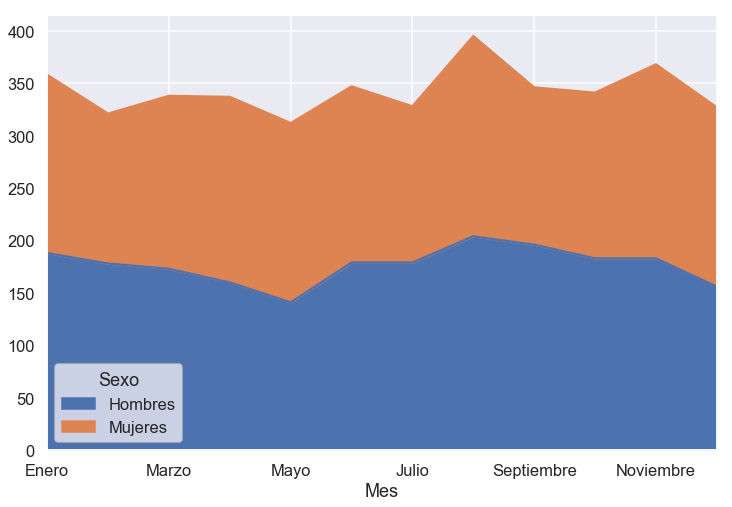

In [15]:
datos_cantabria.drop('Total', axis=1).plot.area(
    figsize=(12, 8)
);

## 6 - Repetir el gráfico anterior sin datos apilados

- Datos apilados por defecto

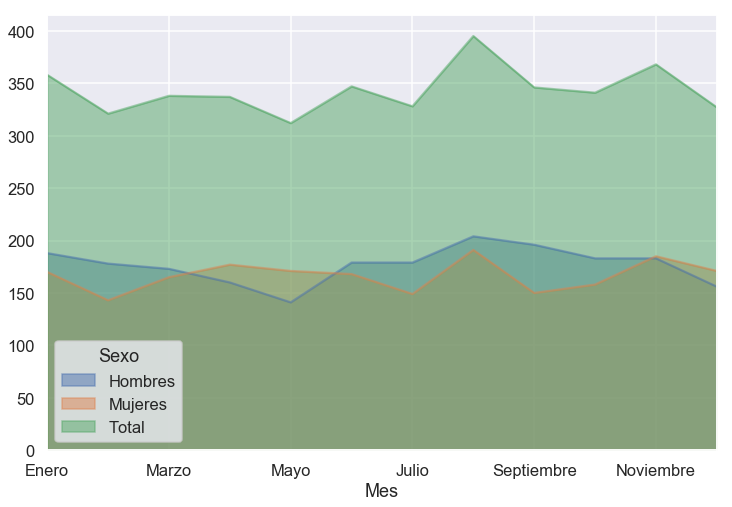

In [16]:
(fig, ax) = plt.subplots()

datos_cantabria.plot.area(
    figsize=(12, 8),
    stacked=False,
    ax=ax
);

## 7 - Crear un diagrama de cajas (`boxplot`) sin cuadrícula

- Usar un tamaño de 8 por 6 pulgadas

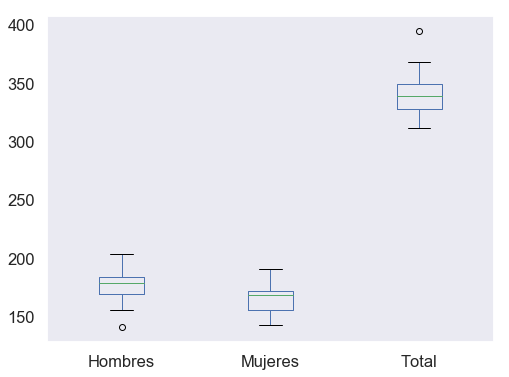

In [17]:
datos_cantabria.boxplot(
    grid=False,
    figsize=(8, 6)
);

## 8 - Repetir el diagrama anterior girando las etiquetas del eje 'x'

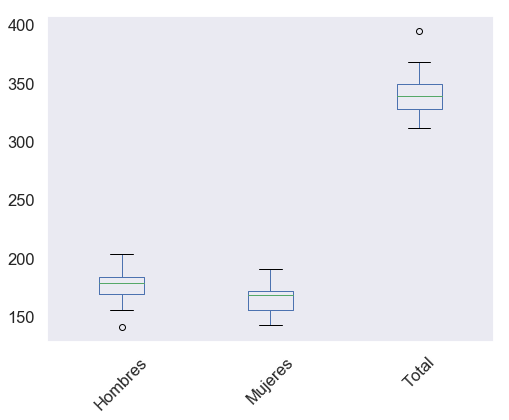

In [18]:
datos_cantabria.boxplot(
    grid=False,
    figsize=(8, 6),
    rot=45
);

## 9 - Ajustar los ejes en el gráfico generado en `2`

- Eje 'x' entre 3 y  (3=Abril, 8=Septiembre)
- Eje 'y' entre 0 y 1500
- Sin cuadrícula
- **`[BONUS]`**: Leyenda en la parte superior izquierda
- **`[BONUS]`**: añadir marcas en el eje 'x' cada 2 meses

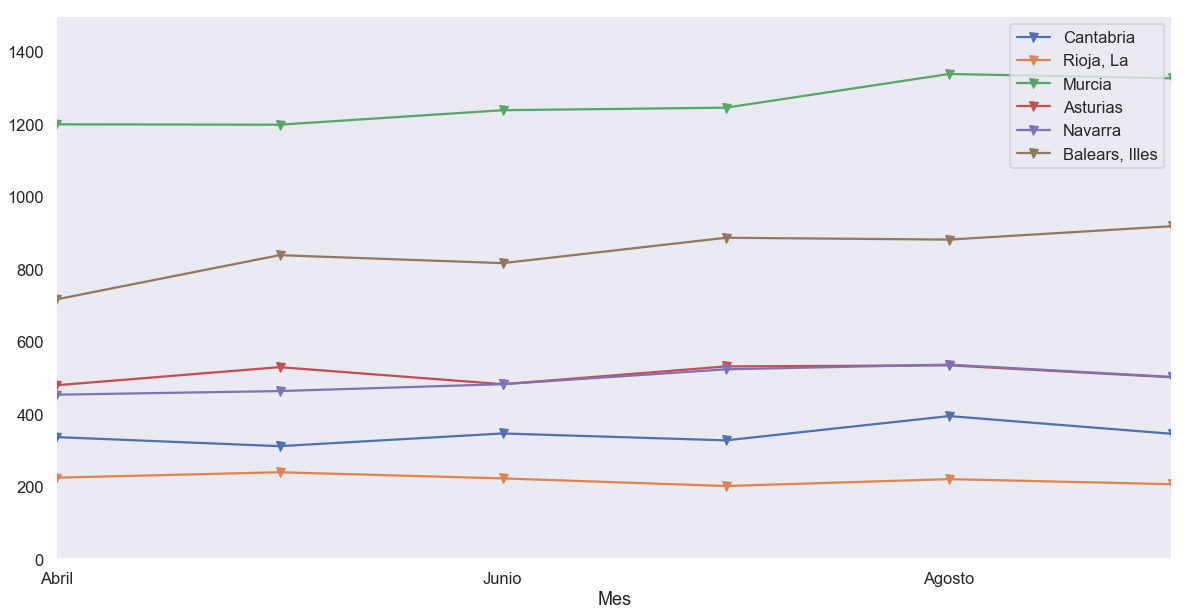

In [19]:
dfu_totales = dfu.xs('Total', axis=1, level=1)    # extrae columna de totales

dfu_totales.drop('Madrid').T.plot(
    style='-v',
    xlim=(3, 8),
    ylim=(0, 1500),
    grid=False,
    legend='topleft',
    xticks=range(3, 8, 2)
);


## 10 - Cambiar el mapa de colores del gráfico anterior

In [20]:
# Lista de mapas de colores disponibles
# colores invertidos: nombre_r (ejemplo: 'Blues_r')

print([cm for cm in plt.colormaps() if not cm.endswith("_r")])

['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']


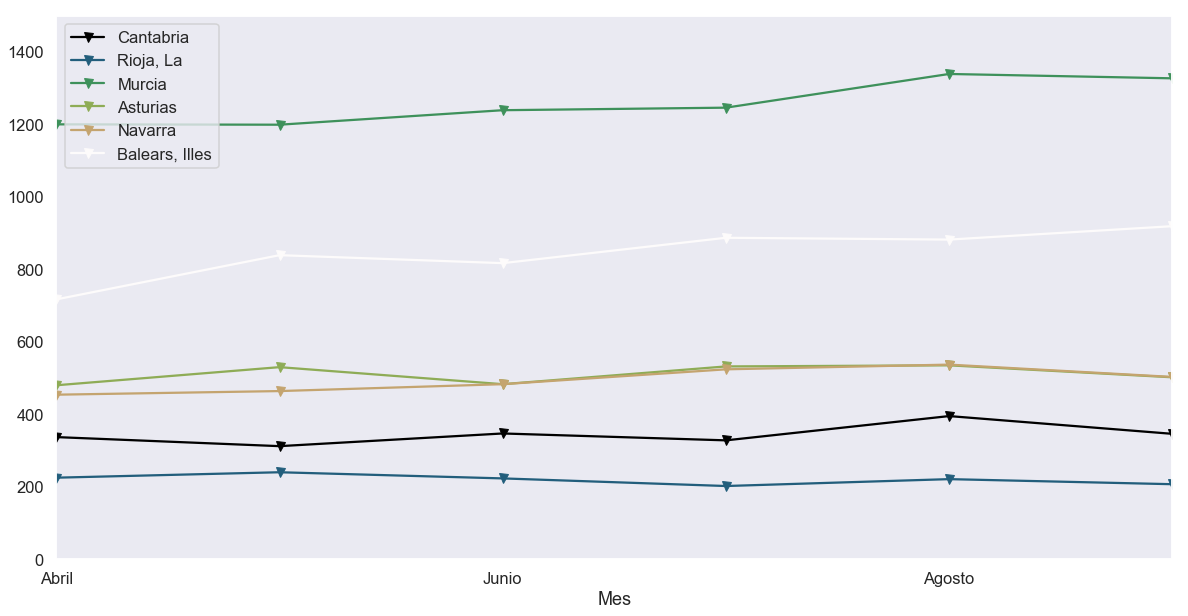

In [21]:
ax = dfu_totales.drop('Madrid').T.plot(
    style='-v',
    xlim=(3, 8),
    ylim=(0, 1500),
    grid=False,
    legend='topleft',
    xticks=range(3, 8, 2),
    cmap='gist_earth'
);

ax.legend(loc='upper left');

## 11 - Añadir un segundo eje de ordenadas con los datos de Madrid

- Omitir el posicionamiento de la leyenda

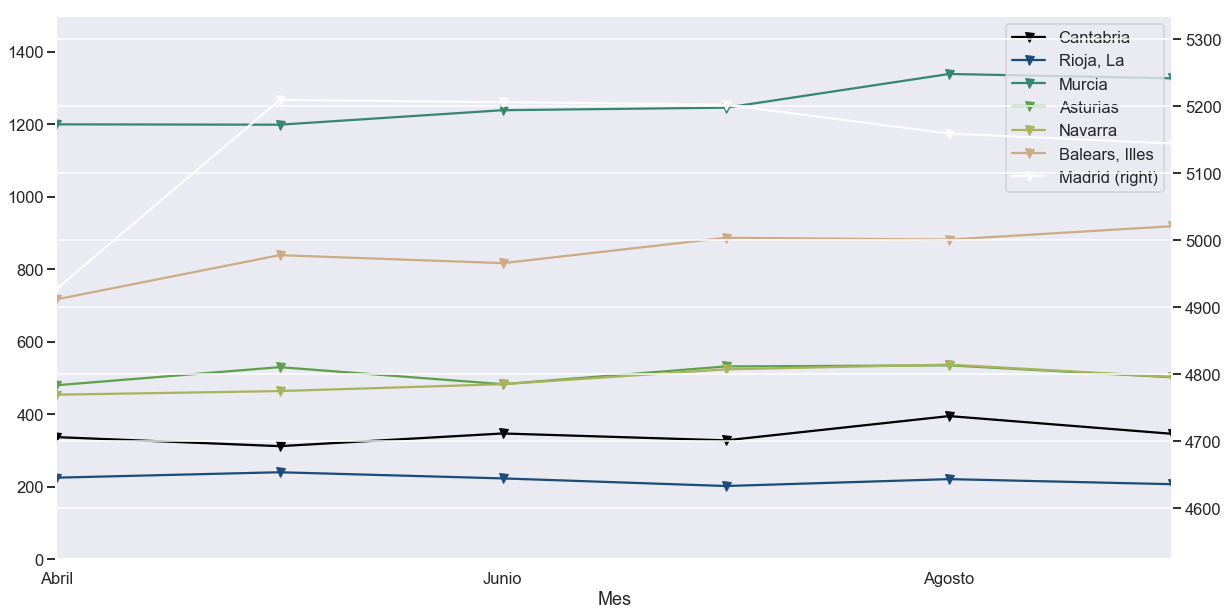

In [22]:
dfu_totales.T.plot(
    style='-v',
    xlim=(3, 8),
    ylim=(0, 1500),
    grid=False,
    legend='topleft',
    xticks=range(3, 8, 2),
    cmap='gist_earth',
    secondary_y='Madrid'
);

## 12 - Incluir los datos en el segundo gráfico generado en [1]

- **`[BONUS]`**: Elimina los ticks del eje 'x' (`set_xticklabels()`)

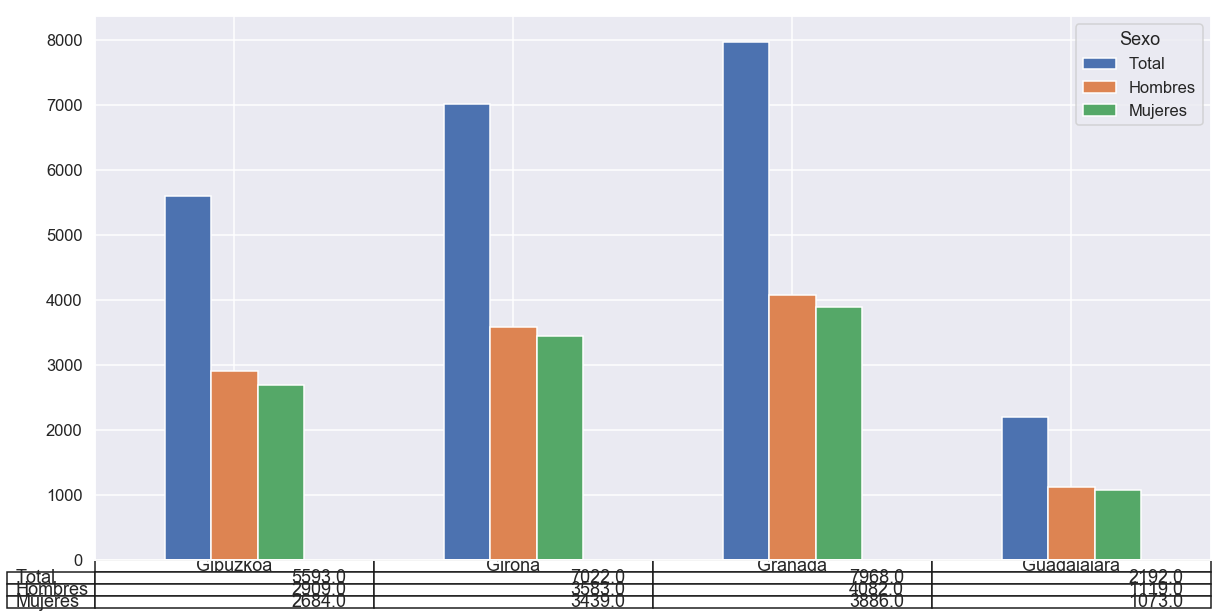

In [23]:
ax = dfg.plot.bar(table=True);
ax.set_xticklabels([]);

# BONUS

## Generar un gráfico circular con estilo 'xkcd' con los datos de Cantabria

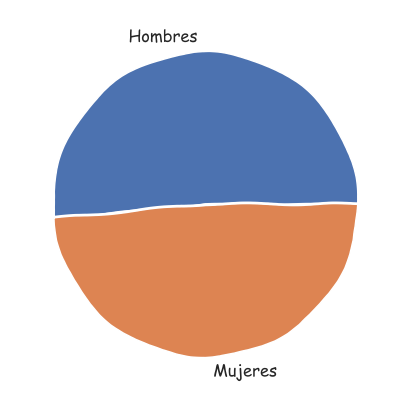

In [24]:
with plt.xkcd():
    ax = datos_cantabria.drop('Total', axis=1).sum().plot.pie(figsize=(7, 7))
    ax.set_ylabel('')